https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("student-mat.csv",sep=';')

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_int = df[['age','Medu', 'Fedu','traveltime', 'studytime',
       'failures','famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_int)
df_int['kmeans_1'] =  kmeans.labels_
y = kmeans.labels_
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
sum(map(lambda x : x == 1, y))

81

In [ ]:
sum(map(lambda x : x == 2, y))

5

In [ ]:
sum(map(lambda x : x == 0, y))

309

**PREGUNTA**
1. Cuantos valores tenemos de cada clase, 0,1,2 usando kmeans con random_state = 0 ?

In [ ]:
samples=df_int.values
samples

array([[18,  4,  4, ...,  3,  6,  0],
       [17,  1,  1, ...,  3,  4,  0],
       [15,  1,  1, ...,  3, 10,  1],
       ...,
       [21,  1,  1, ...,  3,  3,  0],
       [18,  3,  2, ...,  5,  0,  0],
       [19,  1,  1, ...,  5,  5,  0]])

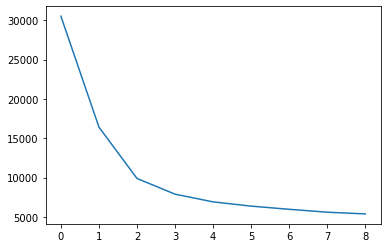

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

inertias
plt.plot(inertias)
#puede observarse en el gráfico como 3 clusters sería el punto ideal ya que es cuando se reduce más.

**PREGUNTA**
2. Que método empleamos para encontrar el valor de k?
3. En que valor podemos estimar que se encuentra el codo?

en 2

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_int['avg'] = (df[['G1', 'G2', 'G3']].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_int.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,kmeans_1,avg
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,5.666667
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,5.333333
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,8.333333
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,14.666667
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,8.666667


In [ ]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [ ]:
df_int['notas_rango_1_10'] = ''
for row in range(len(df_int['avg'])):
  df_int['notas_rango_1_10'][row] = int(translate(df_int['avg'][row],0,20,0,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [ ]:
df_int.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,kmeans_1,avg,notas_rango_1_10
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,5.666667,2
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,5.333333,2
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,8.333333,4
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,14.666667,7
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,8.666667,4


In [ ]:
df_int['nivel'] = ''

for row in range(len(df_int['notas_rango_1_10'])):
  element = df_int['notas_rango_1_10'][row]
  if element < 5:
    df_int['nivel'][row] = 'suspendido'
  elif 5 <= element < 6:
    df_int['nivel'][row] = 'aprobado'
  elif 6 <= element < 7:
    df_int['nivel'][row] = 'bien'
  elif 7 <= element < 9:
    df_int['nivel'][row] = 'notable'
  else:
    df_int['nivel'][row] = 'excelente'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [ ]:
df_int.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,kmeans_1,avg,notas_rango_1_10,nivel
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,5.666667,2,suspendido
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,5.333333,2,suspendido
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,8.333333,4,suspendido
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,14.666667,7,notable
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,8.666667,4,suspendido


In [ ]:
labels_original = df_int['nivel']
data_int = df_int.drop(['nivel','avg','notas_rango_1_10','kmeans_1'], axis=1)

In [ ]:
data_int.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
labels_original.unique()

array(['suspendido', 'notable', 'aprovado', 'bien', 'excelente'],
      dtype=object)

In [ ]:
labels_original_encoded = le.fit_transform(labels_original)

In [ ]:
labels_original_encoded

array([4, 4, 4, 3, 4, 3, 0, 4, 3, 3, 4, 0, 3, 0, 3, 3, 1, 4, 4, 4, 3, 3,
       3, 1, 4, 4, 0, 3, 0, 0, 0, 3, 3, 0, 1, 4, 3, 3, 0, 1, 4, 1, 2, 4,
       4, 4, 0, 2, 3, 4, 1, 1, 0, 4, 1, 4, 3, 3, 4, 3, 0, 4, 4, 4, 0, 3,
       1, 4, 4, 3, 3, 0, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0, 4, 3, 4, 4, 4, 1,
       0, 4, 4, 3, 4, 0, 1, 4, 1, 4, 1, 4, 4, 3, 1, 4, 3, 0, 4, 3, 1, 3,
       2, 4, 1, 2, 4, 3, 1, 1, 4, 1, 3, 3, 1, 1, 4, 1, 4, 4, 4, 2, 4, 4,
       0, 0, 4, 4, 4, 4, 1, 3, 4, 4, 0, 1, 4, 0, 4, 0, 4, 4, 4, 1, 0, 4,
       0, 4, 1, 4, 3, 0, 4, 4, 4, 0, 4, 0, 0, 3, 4, 3, 4, 3, 0, 4, 0, 4,
       1, 4, 4, 0, 4, 1, 3, 4, 1, 0, 0, 3, 4, 4, 1, 4, 4, 4, 1, 3, 3, 4,
       2, 4, 3, 4, 4, 4, 0, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 3, 1, 1, 4, 3, 0, 4, 0, 1, 0, 4, 1, 4, 0, 1, 1, 0, 4, 1, 0,
       4, 1, 4, 2, 1, 4, 4, 3, 4, 4, 4, 4, 0, 4, 1, 0, 3, 4, 3, 4, 1, 4,
       4, 3, 4, 0, 4, 4, 4, 3, 0, 3, 0, 1, 4, 4, 4, 0, 4, 0, 1, 4, 0, 0,
       2, 1, 3, 3, 0, 3, 1, 2, 1, 1, 4, 4, 1, 3, 0,

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Project the data: this step will take several seconds
pca = PCA(n_components=2, random_state=0)
digits_proj = pca.fit_transform(data_int)

# Compute the clusters
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(labels_original_encoded[mask])[0]

accuracy_score(labels_original_encoded, labels)

0.4151898734177215

**PREGUNTA**
Computa la media de las tres evaluaciones y separa los alumnos en suspendidos / aprovado / bien / notable /excelente. Si definimos 5 grupos, cuantas coincidencias hacemos con la predicción de TSNE? Que información nos aportan los resultados?
4. Que accuracy obtenemos con TSNE?